In [1]:
import re
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from collections import Counter

In [2]:
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

# Lendo Arquivos

In [3]:
with open("cleansed_data.csv", "r+", encoding="utf-8", newline="") as f:
    reader = csv.reader(f, delimiter=",", quoting=csv.QUOTE_MINIMAL, quotechar='"')
    data = [row for row in reader]
    header = data.pop(0)

In [4]:
df = pd.DataFrame(data=data, columns=header)
df.head(10)

,terms,major_terms,titles,abstracts
0,['cs.LG'],['cs'],Multi-Level Attention Pooling for Graph Neural...,Graph neural networks (GNNs) have been widely ...
1,"['cs.LG', 'cs.AI']",['cs'],Decision Forests vs. Deep Networks: Conceptual...,Deep networks and decision forests (such as ra...
2,"['cs.LG', 'cs.CR', 'stat.ML']","['stat', 'cs']",Power up! Robust Graph Convolutional Network v...,Graph convolutional networks (GCNs) are powerf...
3,"['cs.LG', 'cs.CR']",['cs'],Releasing Graph Neural Networks with Different...,With the increasing popularity of Graph Neural...
4,['cs.LG'],['cs'],Recurrence-Aware Long-Term Cognitive Network f...,Machine learning solutions for pattern classif...
5,"['cs.LG', 'stat.ML']","['stat', 'cs']",Lifelong Graph Learning,Graph neural networks (GNNs) are powerful mode...
6,['cs.LG'],['cs'],Bayesian graph convolutional neural networks v...,"Deep learning models, such as convolutional ne..."
7,"['cs.LG', 'stat.ML']","['stat', 'cs']",Understanding and Resolving Performance Degrad...,A Graph Convolutional Network (GCN) stacks sev...
8,['cs.LG'],['cs'],Edge-augmented Graph Transformers: Global Self...,Transformer neural networks have achieved stat...
9,"['cs.LG', 'cs.AI']",['cs'],Variational Graph Normalized Auto-Encoders,Link prediction is one of the key problems for...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41115 entries, 0 to 41114
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   terms        41115 non-null  object
 1   major_terms  41115 non-null  object
 2   titles       41115 non-null  object
 3   abstracts    41115 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB


# Funções para processar a base

## Mapeando todas áreas de Física para physics (https://arxiv.org/category_taxonomy)

In [6]:
def map_physics_terms(major_term: str) -> str:
    physics_majors = [
        "atro-ph", 
        "cond-mat", 
        "gr-qc", 
        "hep-ex", 
        "hep-lat", 
        "hep-ph", 
        "hep-th", 
        "math-ph", 
        "nlin",
        "nucl-ex",
        "nucl-th",
        "quant-ph"
    ]

    if major_term in physics_majors:
        return "physics"
        
    return major_term

## Removendo todos objetos que não estejam no formato apresentado pelo link anterior

In [7]:
def handle_major_terms(terms: list) -> list | None:
    final_terms = []
    for term in terms:
        if re.fullmatch(r"^[^0-9\s.]+(\.[^0-9^\s]+)*$", term.lstrip().rstrip()):
            major_term = term.casefold().split(".")[0]
            major_term = map_physics_terms(major_term)
            final_terms.append(major_term)
    return sorted(list(set(final_terms)))

# Gerando nova coluna apenas com os termos certos

In [8]:
df["filtered_major_terms"] = df["terms"].apply(eval).apply(handle_major_terms).apply(str)

In [9]:
df[df["filtered_major_terms"].apply(eval).apply(len) == 0]

,terms,major_terms,titles,abstracts,filtered_major_terms


In [10]:
df.tail(30)

,terms,major_terms,titles,abstracts,filtered_major_terms
41085,"['cs.LG', 'stat.ML']","['stat', 'cs']",Robust Variational Autoencoders for Outlier De...,We focus on the problem of unsupervised cell o...,"['cs', 'stat']"
41086,"['cs.LG', 'stat.ML']","['stat', 'cs']",AP-Perf: Incorporating Generic Performance Met...,We propose a method that enables practitioners...,"['cs', 'stat']"
41087,"['cs.LG', 'cs.AI', 'stat.ML']","['stat', 'cs']",ConQUR: Mitigating Delusional Bias in Deep Q-l...,Delusional bias is a fundamental source of err...,"['cs', 'stat']"
41088,"['cs.LG', 'stat.ML']","['stat', 'cs']",Interpretable Counterfactual Explanations Guid...,"We propose a fast, model agnostic method for f...","['cs', 'stat']"
41089,"['cs.LG', 'stat.ML']","['stat', 'cs']",Lifting Interpretability-Performance Trade-off...,Complex black-box predictive models may have h...,"['cs', 'stat']"
41090,"['cs.CV', 'cs.LG', 'cs.NE']",['cs'],DeepErase: Weakly Supervised Ink Artifact Remo...,"Paper-intensive industries like insurance, law...",['cs']
41091,"['cs.LG', 'cs.AI', 'stat.ML']","['stat', 'cs']",Scalable methods for computing state similarit...,We present new algorithms for computing and ap...,"['cs', 'stat']"
41092,"['cs.LG', 'math.OC', 'math.ST', 'stat.ML', 'st...","['stat', 'cs', 'math']",Non-Asymptotic Gap-Dependent Regret Bounds for...,This paper establishes that optimistic algorit...,"['cs', 'math', 'stat']"
41093,"['cs.LG', 'stat.ML']","['stat', 'cs']",A Wide and Deep Neural Network for Survival An...,We introduce a wide and deep neural network fo...,"['cs', 'stat']"
41094,"['cs.LG', 'cs.CL', 'stat.ML']","['stat', 'cs']",Meta-learning of textual representations,Recent progress in AutoML has lead to state-of...,"['cs', 'stat']"


# Contando `terms` sem processamento

In [11]:
counter_terms = Counter(reduce(lambda x, y: [*x, *y], df["terms"].apply(eval), []))

In [12]:
len(counter_terms)

1177

### Possível perceber `terms` que não estão dentro do padrão da taxonomia do arXiv

In [13]:
counter_terms.most_common()[-10:]

[('60J20, 91D30, 91C20, 62H30', 1),
 ('I.4.6; I.4.10; I.2.6; I.2.10', 1),
 ('62H30, 68T10, 68Q87, 91C20', 1),
 ('I.4.5; I.4.8; I.3.7; I.2.10; I.2.6', 1),
 ('I.2.0; J.1; J.4', 1),
 ('68U35, 68T05, 68-04', 1),
 ('68W50', 1),
 ('D.1.3; G.4; I.2.8; I.2.11; I.5.3; J.3', 1),
 ('68T07, 68T45, 68T10, 68T50, 68U35', 1),
 ('I.2.0; G.3', 1)]

# Contando `major terms`

In [14]:
counter_major_terms = Counter(reduce(lambda x, y: [*x, *y], df["major_terms"].apply(eval), []))

In [15]:
len(counter_major_terms)

466

In [16]:
counter_major_terms.most_common()[-10:]

[('47b34', 1),
 ('90c26, 90c10, 90c17, 68q87, 65c20', 1),
 ('35j08, 35j15, 05c81, 68t05, 35r02', 1),
 ('68-01, 90-01', 1),
 ('60j20 (primary) 62f07, 68t05 (secondary)', 1),
 ('60j20, 91d30, 91c20, 62h30', 1),
 ('62h30, 68t10, 68q87, 91c20', 1),
 ('68u35, 68t05, 68-04', 1),
 ('68w50', 1),
 ('68t07, 68t45, 68t10, 68t50, 68u35', 1)]

# Contando `terms` após processamento

In [17]:
df["filtered_major_terms"].value_counts()

['cs']                                       24853
['cs', 'stat']                               10881
['cs', 'eess']                                2034
['cs', 'math', 'stat']                         852
['cs', 'eess', 'stat']                         514
                                             ...  
['econ', 'q-fin', 'stat']                        1
['astro-ph', 'cs', 'math', 'physics']            1
['cs', 'econ', 'q-bio', 'stat']                  1
['cs', 'econ', 'physics', 'stat']                1
['cs', 'eess', 'math', 'physics', 'stat']        1
Name: filtered_major_terms, Length: 64, dtype: int64

In [18]:
df["filtered_major_terms"].value_counts().shape

(64,)

# Exemplo da limpeza realizada

In [19]:
pd.options.display.max_colwidth = 2000

In [20]:
df[df["terms"].str.contains(r"[0-9]", case=False)][["terms", "major_terms", "filtered_major_terms"]].sample(5)

,terms,major_terms,filtered_major_terms
8121,"['cs.LG', 'stat.ML', 'I.2.6']","['stat', 'cs', 'i']","['cs', 'stat']"
23259,"['cs.LG', 'stat.AP', 'stat.ML', 'I.2.6']","['stat', 'cs', 'i']","['cs', 'stat']"
36440,"['cs.CV', 'cs.NA', 'math.NA', 'math.OC', '90C22, 52C25, 05C50']","['cs', 'math', '90c22, 52c25, 05c50']","['cs', 'math']"
15424,"['cs.CV', 'cs.LG', 'cs.NE', '68T07', 'I.4; I.2']","['cs', 'i', '68t07']",['cs']
11382,"['cs.CV', 'cs.LG', 'physics.app-ph', 'physics.ins-det', 'I.4.7']","['cs', 'physics', 'i']","['cs', 'physics']"


# Pegando apenas `terms` com frequência maior que 100

In [21]:
grouped_by = df.groupby(by=["filtered_major_terms"], as_index=False, group_keys=False).agg(count=("filtered_major_terms", "count")).sort_values(by="count", ascending=False)
grouped_by.head(15)

,filtered_major_terms,count
55,['cs'],24853
54,"['cs', 'stat']",10881
33,"['cs', 'eess']",2034
42,"['cs', 'math', 'stat']",852
32,"['cs', 'eess', 'stat']",514
43,"['cs', 'math']",352
63,['stat'],312
49,"['cs', 'physics']",246
48,"['cs', 'physics', 'stat']",220
51,"['cs', 'q-bio']",163


In [22]:
grouped_by[grouped_by["count"] > 100]

,filtered_major_terms,count
55,['cs'],24853
54,"['cs', 'stat']",10881
33,"['cs', 'eess']",2034
42,"['cs', 'math', 'stat']",852
32,"['cs', 'eess', 'stat']",514
43,"['cs', 'math']",352
63,['stat'],312
49,"['cs', 'physics']",246
48,"['cs', 'physics', 'stat']",220
51,"['cs', 'q-bio']",163


### Aplicando o filtro de categorias com mais de 100 objetos mantém 98% da base (40582 objetos)

In [23]:
grouped_by[grouped_by["count"] > 100]["count"].sum()

40582

In [24]:
(grouped_by[grouped_by["count"] > 100]["count"].sum() / df.shape[0]) * 100

98.70363614252706

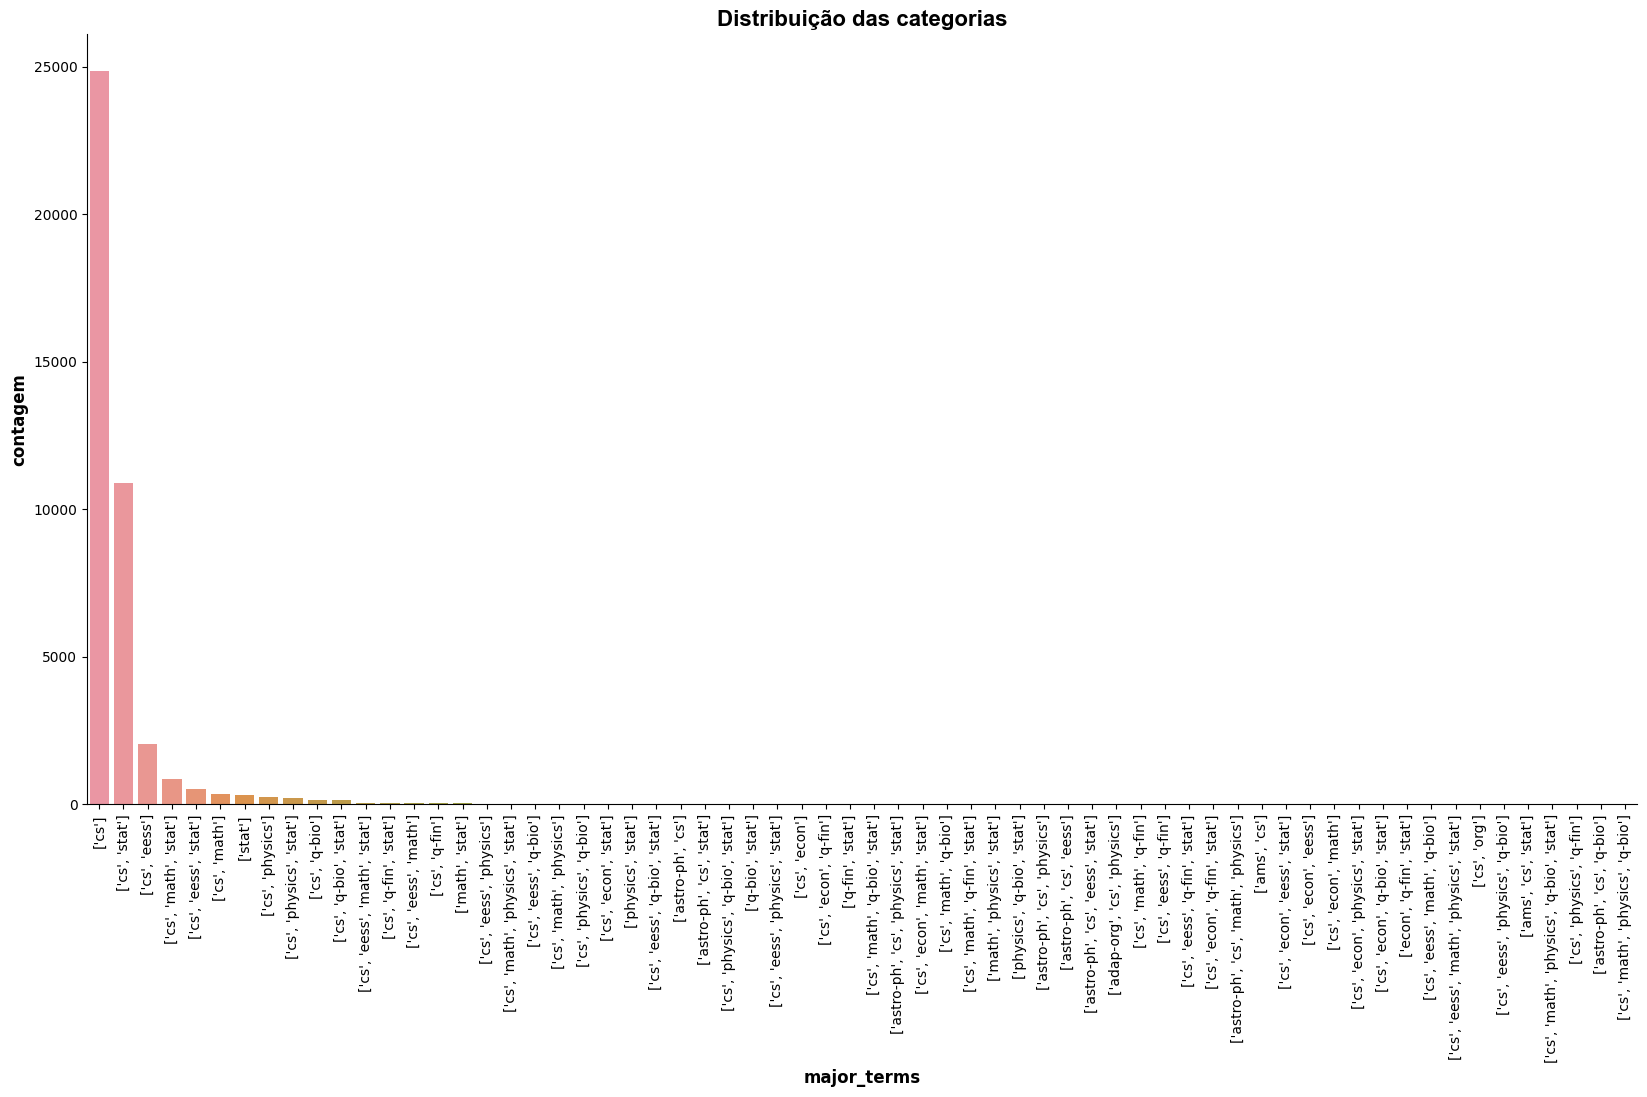

In [25]:
plt.figure(figsize=(20, 10))
sns.barplot(grouped_by, x="filtered_major_terms", y="count")
plt.xticks(rotation=90)
plt.xlabel("major_terms", fontdict={"weight": "bold", "size": 12})
plt.ylabel("contagem", fontdict={"weight": "bold", "size": 12})
plt.title("Distribuição das categorias", fontdict={"weight": "bold", "size": 16, "family": "Arial"})
plt.show()

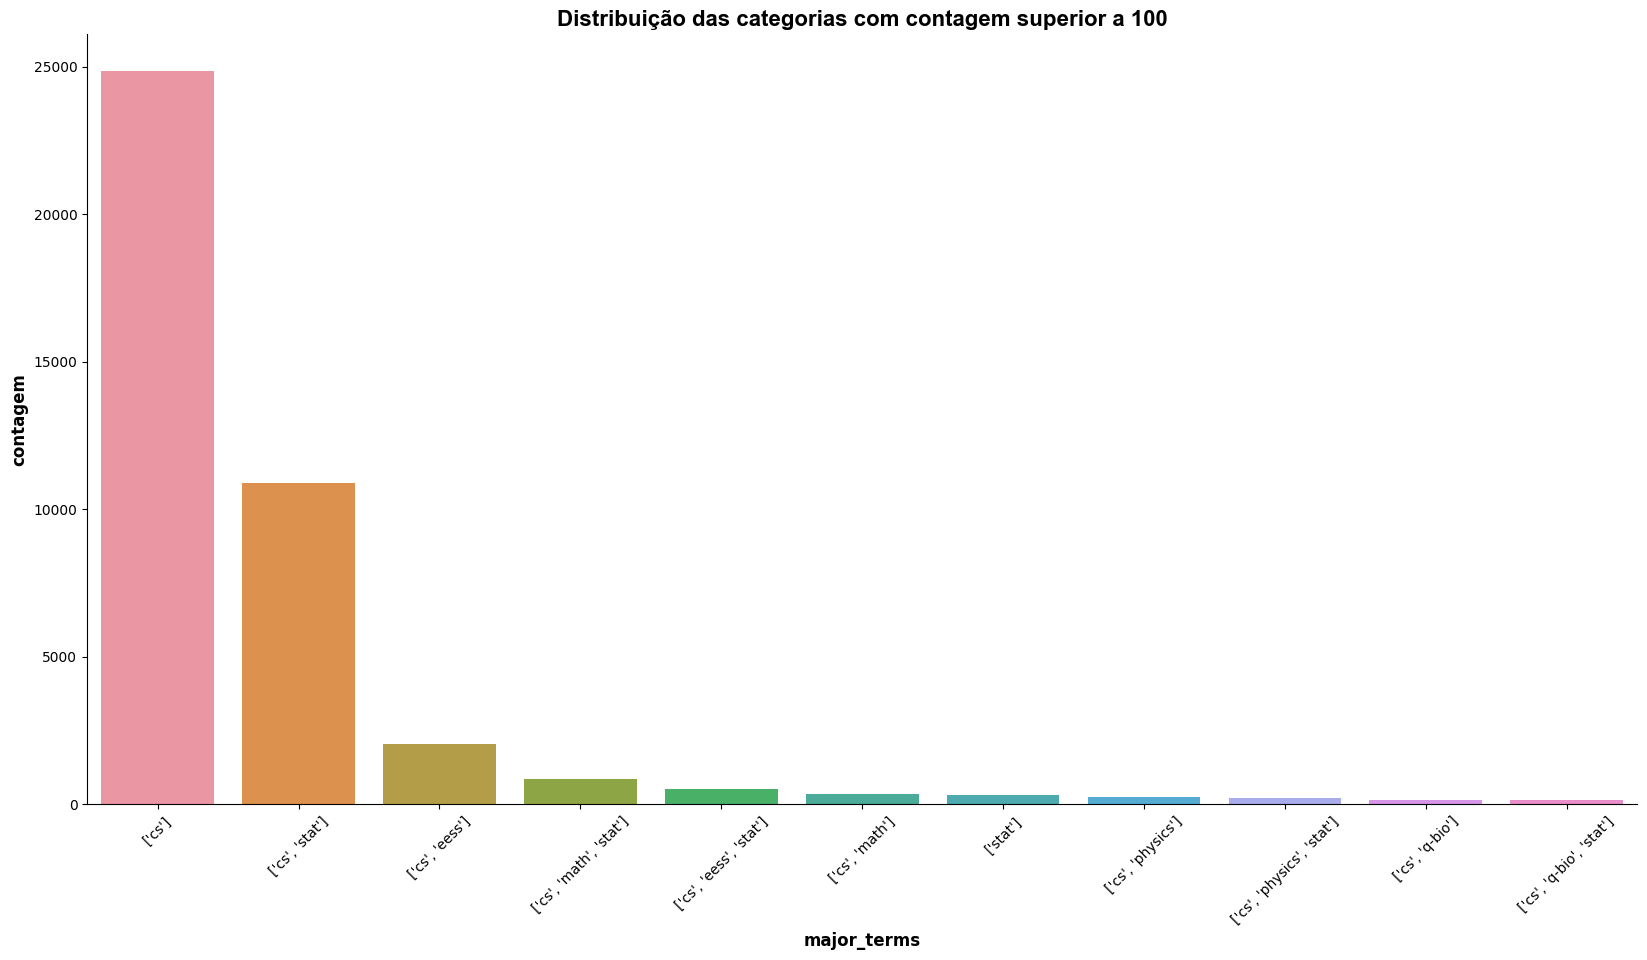

In [26]:
plt.figure(figsize=(20, 10))
sns.barplot(grouped_by[grouped_by["count"] > 100], x="filtered_major_terms", y="count")
plt.xticks(rotation=45)
plt.xlabel("major_terms", fontdict={"weight": "bold", "size": 12})
plt.ylabel("contagem", fontdict={"weight": "bold", "size": 12})
plt.title("Distribuição das categorias com contagem superior a 100", fontdict={"weight": "bold", "size": 16, "family": "Arial"})
plt.show()

In [40]:
top_3 = grouped_by.sort_values(by="count", ascending=False).iloc[:3]["filtered_major_terms"].values

In [42]:
df1 = df.copy()
df1.sample(2)

,terms,major_terms,titles,abstracts,filtered_major_terms
15722,['cs.CV'],['cs'],Anomaly Detection with Adversarial Dual Autoencoders,"Semi-supervised and unsupervised Generative Adversarial Networks (GAN)-based\nmethods have been gaining popularity in anomaly detection task recently.\nHowever, GAN training is somewhat challenging and unstable. Inspired from\nprevious work in GAN-based image generation, we introduce a GAN-based anomaly\ndetection framework - Adversarial Dual Autoencoders (ADAE) - consists of two\nautoencoders as generator and discriminator to increase training stability. We\nalso employ discriminator reconstruction error as anomaly score for better\ndetection performance. Experiments across different datasets of varying\ncomplexity show strong evidence of a robust model that can be used in different\nscenarios, one of which is brain tumor detection.",['cs']
5938,['cs.CV'],['cs'],Full Flow: Optical Flow Estimation By Global Optimization over Regular Grids,We present a global optimization approach to optical flow estimation. The\napproach optimizes a classical optical flow objective over the full space of\nmappings between discrete grids. No descriptor matching is used. The highly\nregular structure of the space of mappings enables optimizations that reduce\nthe computational complexity of the algorithm's inner loop from quadratic to\nlinear and support efficient matching of tens of thousands of nodes to tens of\nthousands of displacements. We show that one-shot global optimization of a\nclassical Horn-Schunck-type objective over regular grids at a single resolution\nis sufficient to initialize continuous interpolation and achieve\nstate-of-the-art performance on challenging modern benchmarks.,['cs']


In [44]:
df1["major_terms"] = df1["filtered_major_terms"]
df1.sample(2)

,terms,major_terms,titles,abstracts,filtered_major_terms
11904,"['cs.CV', 'cs.LG', 'eess.IV']","['cs', 'eess']",Towards Robust Medical Image Segmentation on Small-Scale Data with Incomplete Labels,"The data-driven nature of deep learning models for semantic segmentation\nrequires a large number of pixel-level annotations. However, large-scale and\nfully labeled medical datasets are often unavailable for practical tasks.\nRecently, partially supervised methods have been proposed to utilize images\nwith incomplete labels to mitigate the data scarcity problem in the medical\ndomain. As an emerging research area, the breakthroughs made by existing\nmethods rely on either large-scale data or complex model design, which makes\nthem 1) less practical for certain real-life tasks and 2) less robust for\nsmall-scale data. It is time to step back and think about the robustness of\npartially supervised methods and how to maximally utilize small-scale and\npartially labeled data for medical image segmentation tasks. To bridge the\nmethodological gaps in label-efficient deep learning with partial supervision,\nwe propose RAMP, a simple yet efficient data augmentation framework for\npartially supervised medical image segmentation by exploiting the assumption\nthat patients share anatomical similarities. We systematically evaluate RAMP\nand the previous methods in various controlled multi-structure segmentation\ntasks. Compared to the mainstream approaches, RAMP consistently improves the\nperformance of traditional segmentation networks on small-scale partially\nlabeled data and utilize additional image-wise weak annotations.","['cs', 'eess']"
10525,['cs.CV'],['cs'],ScreenerNet: Learning Self-Paced Curriculum for Deep Neural Networks,"We propose to learn a curriculum or a syllabus for supervised learning and\ndeep reinforcement learning with deep neural networks by an attachable deep\nneural network, called ScreenerNet. Specifically, we learn a weight for each\nsample by jointly training the ScreenerNet and the main network in an\nend-to-end self-paced fashion. The ScreenerNet neither has sampling bias nor\nrequires to remember the past learning history. We show the networks augmented\nwith the ScreenerNet achieve early convergence with better accuracy than the\nstate-of-the-art curricular learning methods in extensive experiments using\nthree popular vision datasets such as MNIST, CIFAR10 and Pascal VOC2012, and a\nCart-pole task using Deep Q-learning. Moreover, the ScreenerNet can extend\nother curriculum learning methods such as Prioritized Experience Replay (PER)\nfor further accuracy improvement.",['cs']


In [46]:
df1 = df1.drop(columns=["filtered_major_terms"])
df1.sample(2)

,terms,major_terms,titles,abstracts
8249,"['cs.LG', 'eess.SP']","['cs', 'eess']",A Relearning Approach to Reinforcement Learning for Control of Smart Buildings,"This paper demonstrates that continual relearning of control policies using\nincremental deep reinforcement learning (RL) can improve policy learning for\nnon-stationary processes. We demonstrate this approach for a data-driven 'smart\nbuilding environment' that we use as a test-bed for developing HVAC controllers\nfor reducing energy consumption of large buildings on our university campus.\nThe non-stationarity in building operations and weather patterns makes it\nimperative to develop control strategies that are adaptive to changing\nconditions. On-policy RL algorithms, such as Proximal Policy Optimization (PPO)\nrepresent an approach for addressing this non-stationarity, but exploration on\nthe actual system is not an option for safety-critical systems. As an\nalternative, we develop an incremental RL technique that simultaneously reduces\nbuilding energy consumption without sacrificing overall comfort. We compare the\nperformance of our incremental RL controller to that of a static RL controller\nthat does not implement the relearning function. The performance of the static\ncontroller diminishes significantly over time, but the relearning controller\nadjusts to changing conditions while ensuring comfort and optimal energy\nperformance."
10068,"['cs.LG', 'stat.ML']","['cs', 'stat']",Off-Policy Actor-Critic in an Ensemble: Achieving Maximum General Entropy and Effective Environment Exploration in Deep Reinforcement Learning,"We propose a new policy iteration theory as an important extension of soft\npolicy iteration and Soft Actor-Critic (SAC), one of the most efficient model\nfree algorithms for deep reinforcement learning. Supported by the new theory,\narbitrary entropy measures that generalize Shannon entropy, such as Tsallis\nentropy and Renyi entropy, can be utilized to properly randomize action\nselection while fulfilling the goal of maximizing expected long-term rewards.\nOur theory gives birth to two new algorithms, i.e., Tsallis entropy\nActor-Critic (TAC) and Renyi entropy Actor-Critic (RAC). Theoretical analysis\nshows that these algorithms can be more effective than SAC. Moreover, they pave\nthe way for us to develop a new Ensemble Actor-Critic (EAC) algorithm in this\npaper that features the use of a bootstrap mechanism for deep environment\nexploration as well as a new value-function based mechanism for high-level\naction selection. Empirically we show that TAC, RAC and EAC can achieve\nstate-of-the-art performance on a range of benchmark control tasks,\noutperforming SAC and several cutting-edge learning algorithms in terms of both\nsample efficiency and effectiveness."


In [51]:
df2 = df1[df1["major_terms"].isin(top_3)].copy()
df2.sample()

,terms,major_terms,titles,abstracts
22079,['cs.CV'],['cs'],DF^2AM: Dual-level Feature Fusion and Affinity Modeling for RGB-Infrared Cross-modality Person Re-identification,"RGB-infrared person re-identification is a challenging task due to the\nintra-class variations and cross-modality discrepancy. Existing works mainly\nfocus on learning modality-shared global representations by aligning image\nstyles or feature distributions across modalities, while local feature from\nbody part and relationships between person images are largely neglected. In\nthis paper, we propose a Dual-level (i.e., local and global) Feature Fusion\n(DF^2) module by learning attention for discriminative feature from local to\nglobal manner. In particular, the attention for a local feature is determined\nlocally, i.e., applying a learned transformation function on itself. Meanwhile,\nto further mining the relationships between global features from person images,\nwe propose an Affinities Modeling (AM) module to obtain the optimal intra- and\ninter-modality image matching. Specifically, AM employes intra-class\ncompactness and inter-class separability in the sample similarities as\nsupervised information to model the affinities between intra- and\ninter-modality samples. Experimental results show that our proposed method\noutperforms state-of-the-arts by large margins on two widely used\ncross-modality re-ID datasets SYSU-MM01 and RegDB, respectively."


In [53]:
df2["major_terms"].value_counts()

['cs']            24853
['cs', 'stat']    10881
['cs', 'eess']     2034
Name: major_terms, dtype: int64

In [56]:
grouped_by.sort_values(by="count", ascending=False).iloc[:3]

,filtered_major_terms,count
55,['cs'],24853
54,"['cs', 'stat']",10881
33,"['cs', 'eess']",2034


In [57]:
grouped_by.sort_values(by="count", ascending=False).iloc[:3].sum()

filtered_major_terms    ['cs']['cs', 'stat']['cs', 'eess']
count                                                37768
dtype: object

In [58]:
df2.shape[0]

37768

In [59]:
df2.to_csv("filtered_cleansed_data.csv", encoding="utf-8", sep=",", quoting=csv.QUOTE_MINIMAL, quotechar='"', index=False) 